### Import Relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mrmr import mrmr_regression
from sklearn.preprocessing import MinMaxScaler






### Data Analysis and Features selection

In [2]:
patient_208 = pd.read_csv('Patient 208_data.csv')

In [3]:
patient_208.describe()

,hm_mode0,hm_mode1,hm_mode2,hm_mode3,hm_mode4,hc_mode0,hc_mode1,hc_mode2,hc_mode3,hc_mode4,...,Disp_mode1,Disp_mode2,Disp_mode3,Disp_mode4,dispm_mode0,dispm_mode1,dispm_mode2,dispm_mode3,dispm_mode4,BIS
count,7875.000000,7875.000000,7875.000000,7875.000000,7875.000000,7875.000000,7875.000000,7875.000000,7875.000000,7875.000000,...,7875.000000,7875.000000,7875.000000,7875.000000,7875.000000,7875.000000,7875.000000,7875.000000,7875.000000,7875.000000
mean,0.027185,0.221017,0.547491,0.966238,1.497164,6.340093,1.308249,1.054301,1.017465,1.005343,...,1.797524,1.865044,1.796078,1.976111,0.867998,1.519607,2.002553,2.058400,1.981686,39.854273
std,0.003653,0.008402,0.011462,0.015629,0.010332,4.032991,0.130306,0.020137,0.005130,0.000766,...,0.037019,0.016996,0.023737,0.044073,0.036047,0.036128,0.032957,0.020726,0.011003,15.629965
min,0.004188,0.184849,0.517939,0.945677,1.461211,2.670024,1.205689,1.013419,1.010419,0.996538,...,1.429033,1.804482,1.743663,1.521657,0.466154,1.176822,1.659265,1.791041,1.824364,24.400000
25%,0.024604,0.217204,0.538303,0.957139,1.491307,4.608214,1.244760,1.043923,1.014564,1.005069,...,1.790669,1.855729,1.782640,1.969007,0.853989,1.512049,2.002114,2.060372,1.980483,31.600000
50%,0.026611,0.221267,0.545223,0.960831,1.492938,4.974620,1.258968,1.049805,1.015709,1.005456,...,1.802151,1.864529,1.792867,1.983628,0.870097,1.525418,2.005918,2.060920,1.982250,35.500000
75%,0.029322,0.225042,0.554954,0.965919,1.496090,5.497290,1.280954,1.055860,1.017461,1.005732,...,1.814616,1.872968,1.804076,1.996121,0.885343,1.535994,2.010568,2.061405,1.984149,40.200000
max,0.041386,0.255563,0.592696,1.029962,1.531127,34.678103,1.984499,1.210547,1.082018,1.019274,...,1.854599,2.037744,2.042136,2.034519,0.961000,1.576043,2.029470,2.068552,2.051546,97.700000


In [4]:
X=patient_208.drop('BIS', axis=1)
y= patient_208['BIS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear regression

In [5]:
metrics = {}
def plot_regression(data, column):
    
    global metrics
    
    X = data[column].values.reshape(-1, 1)
    #X = X[:, np.newaxis]
    y = data['BIS']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform regression
    reg = LinearRegression(n_jobs=-1).fit(X_train_scaled, y_train)
    
    # Predictions
    y_predicted = reg.predict(X_test_scaled)
    
    # Show the score and r2
    #mse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    # keep track of metrics
    
    #metrics["{}_mse".format(column)] = mse
    metrics["{}_r2".format(column)] = r2
    
    
    
    # Plot the graph#
    plt.figure(figsize=(8,6))
    plt.scatter(data[column], data['BIS'], label="data", c="blue")
    plt.plot(X_test, y_predicted, label="Regression", c="red")
    plt.xlabel(column)
    plt.ylabel('BIS')
    plt.legend(loc="upper left")
    plt.show()

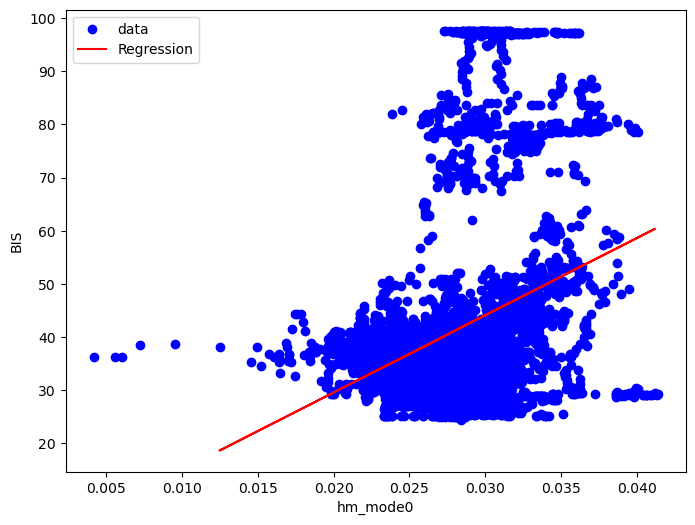

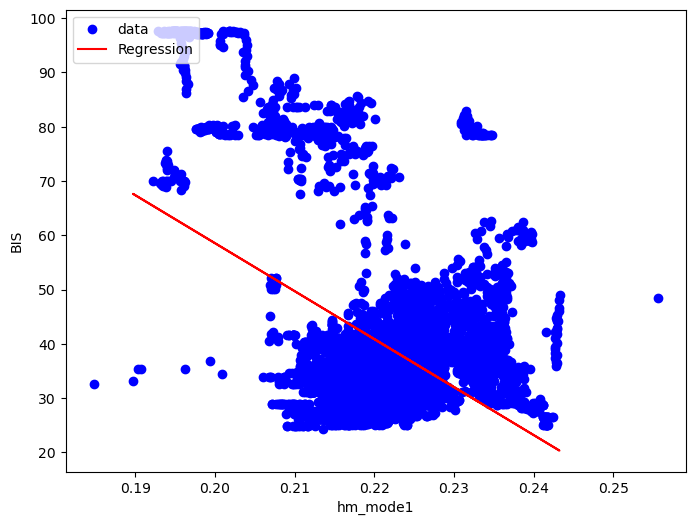

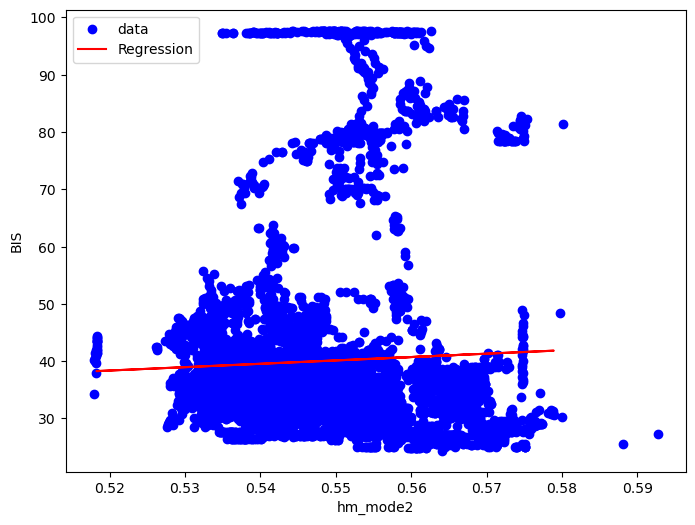

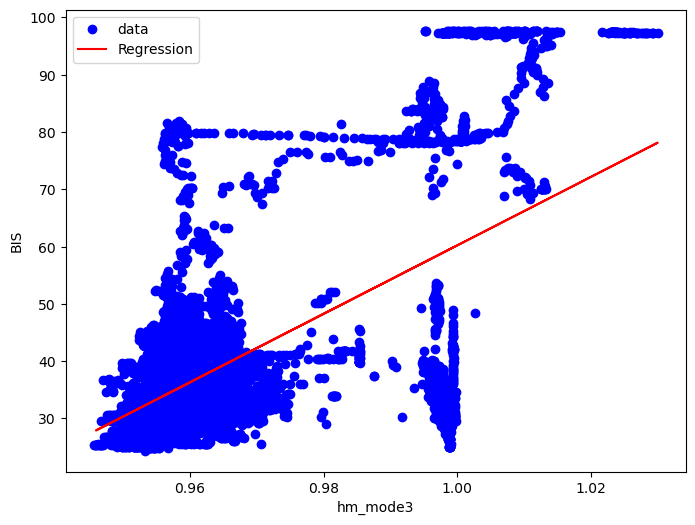

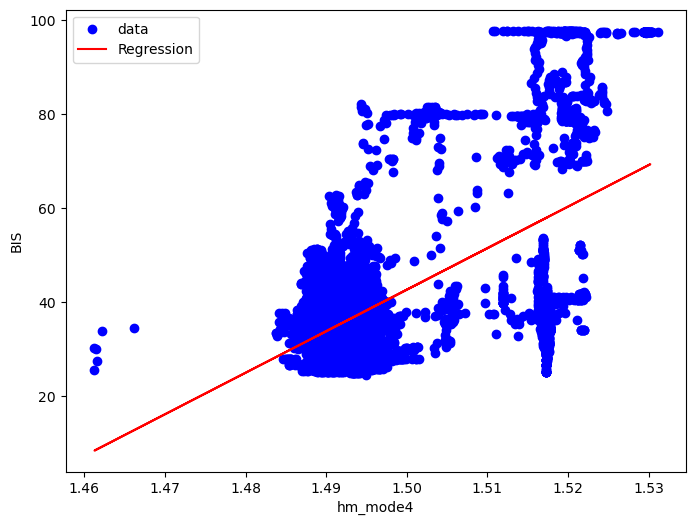

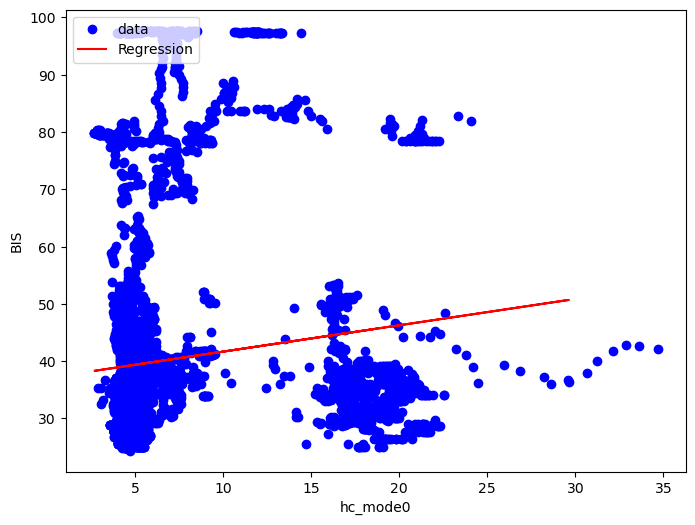

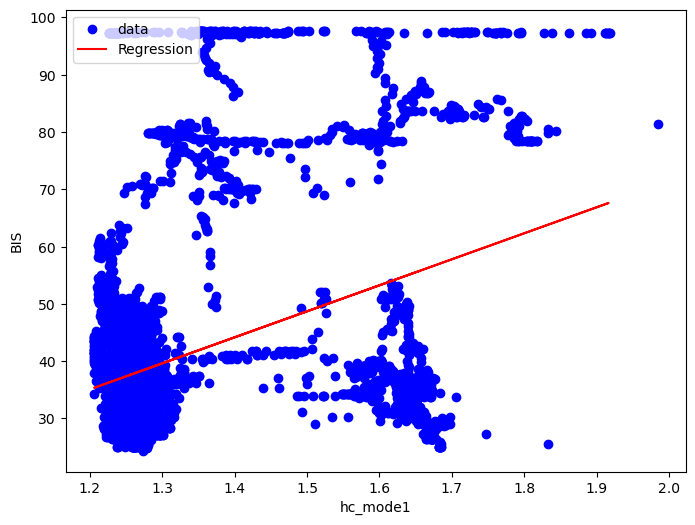

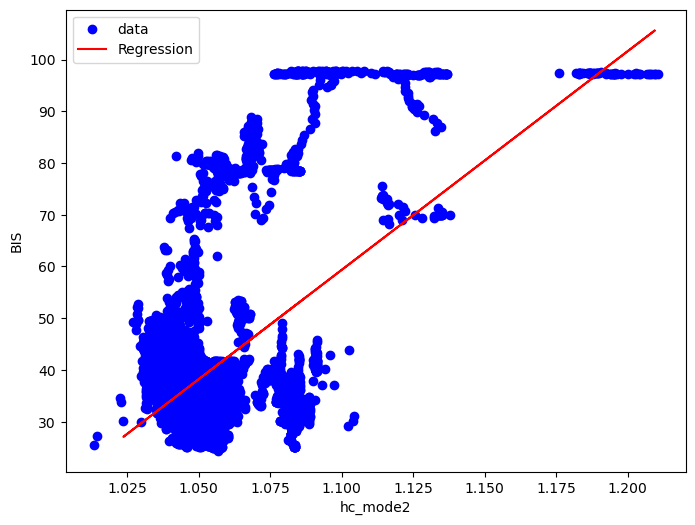

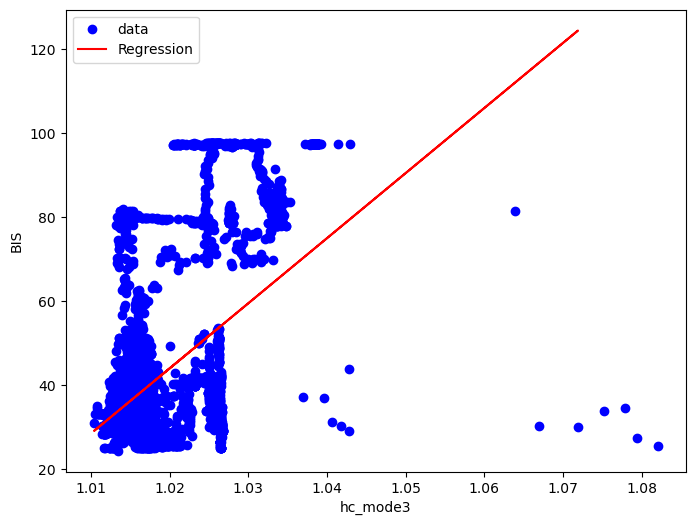

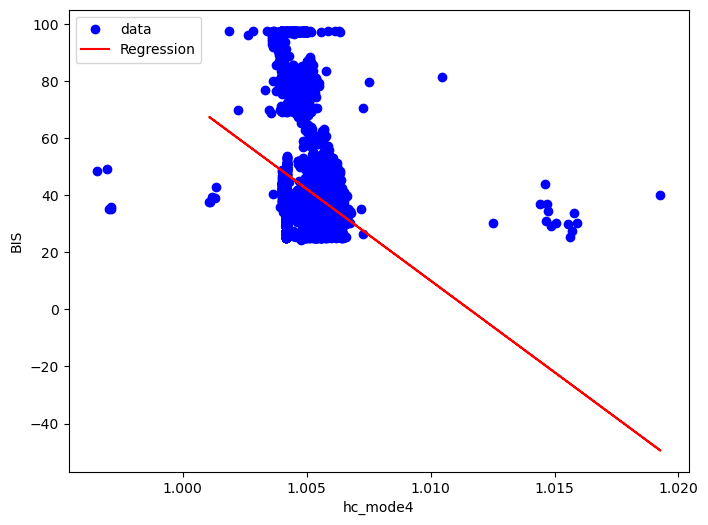

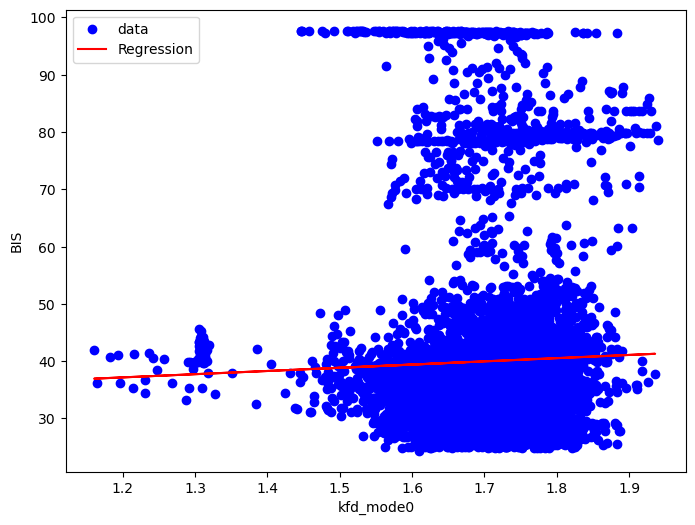

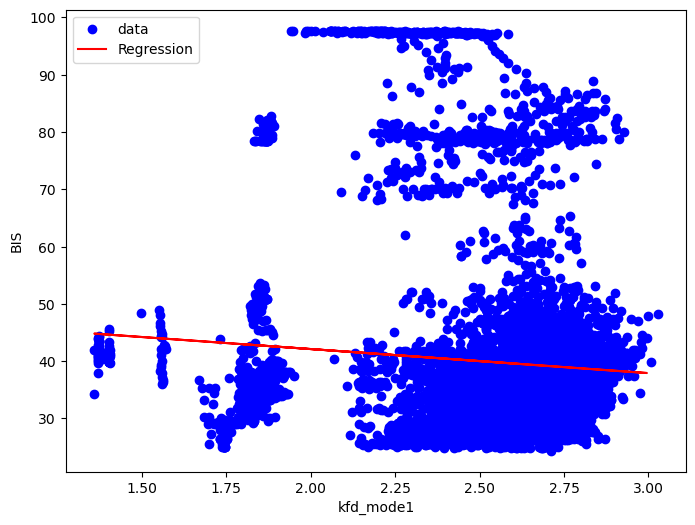

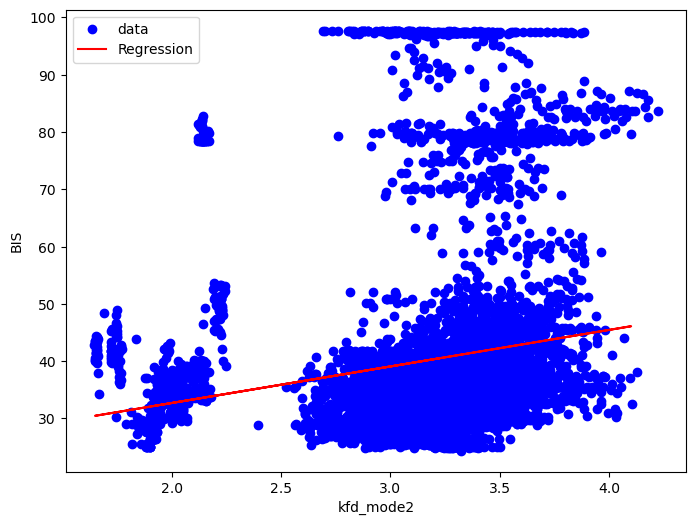

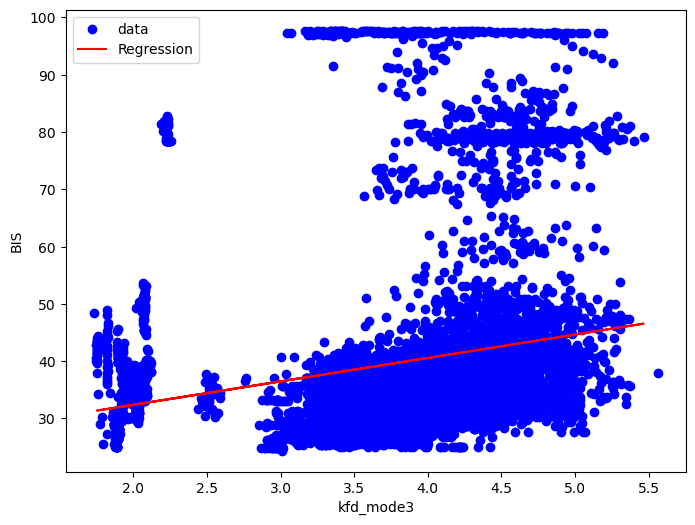

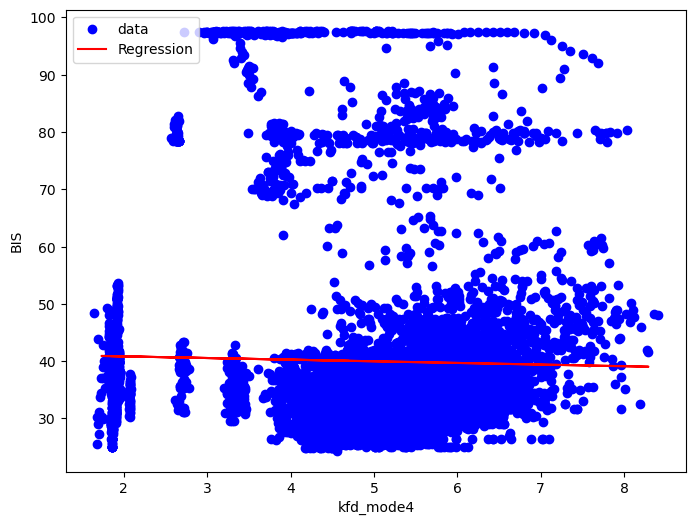

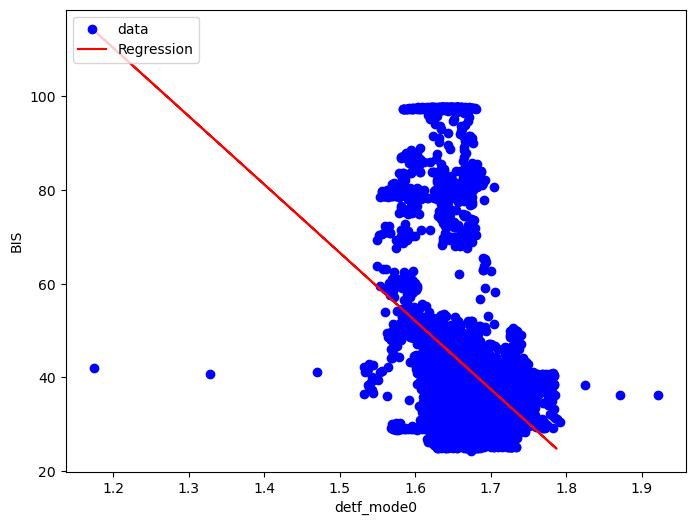

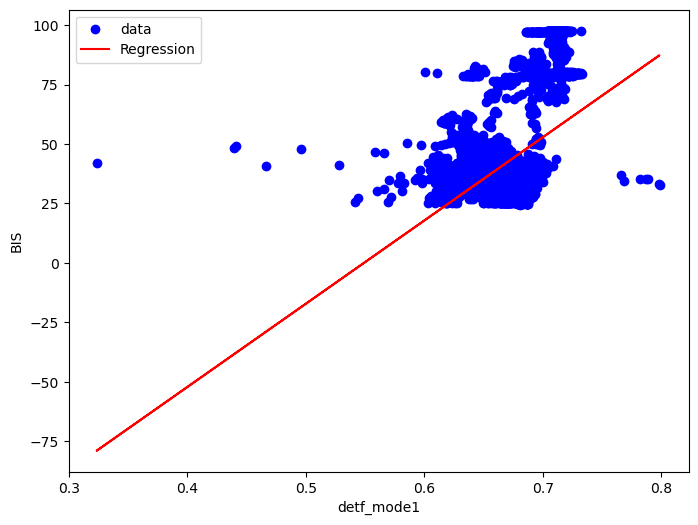

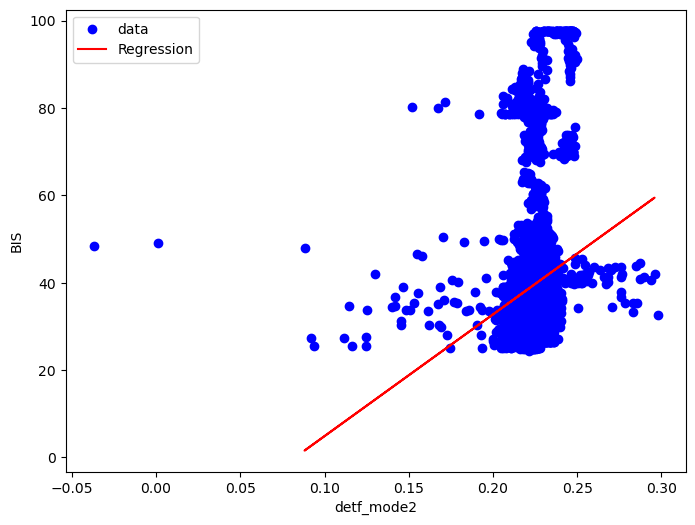

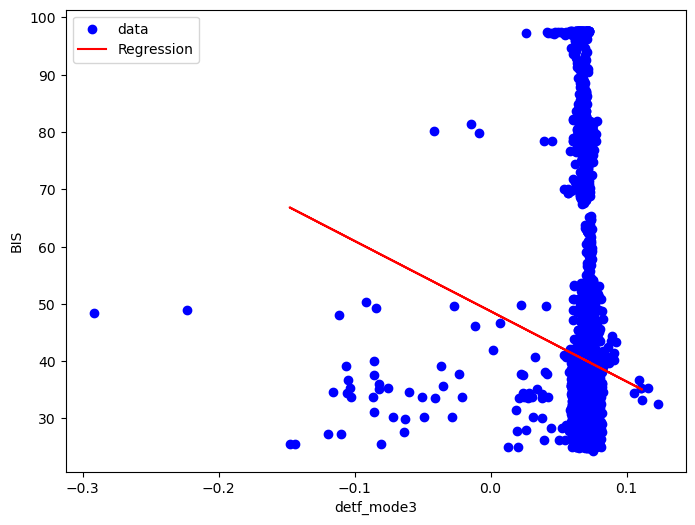

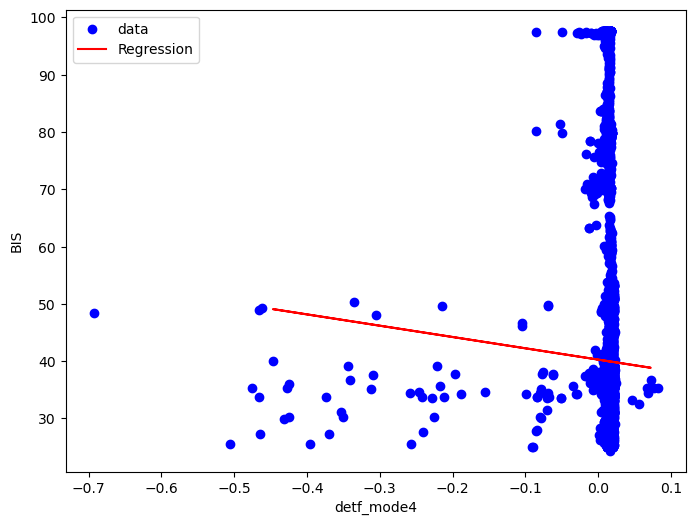

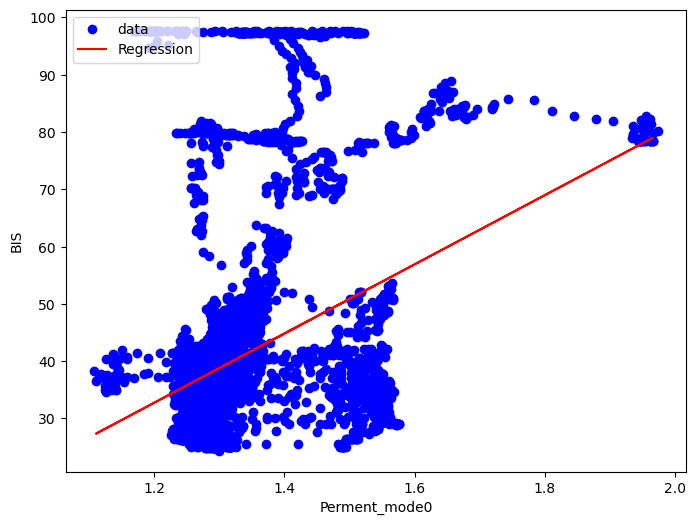

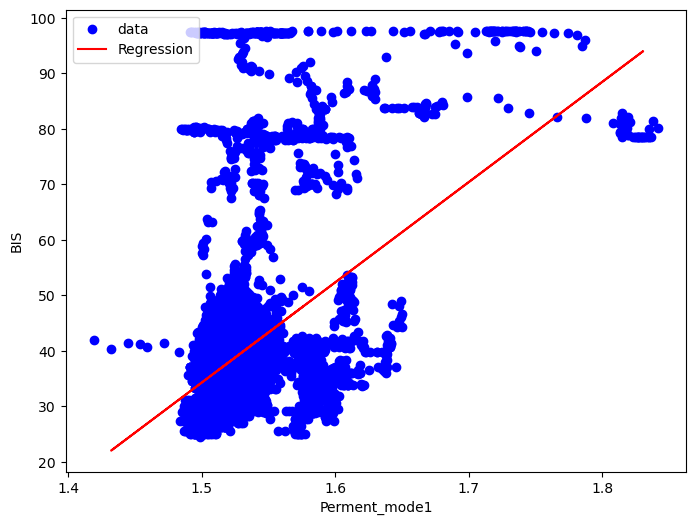

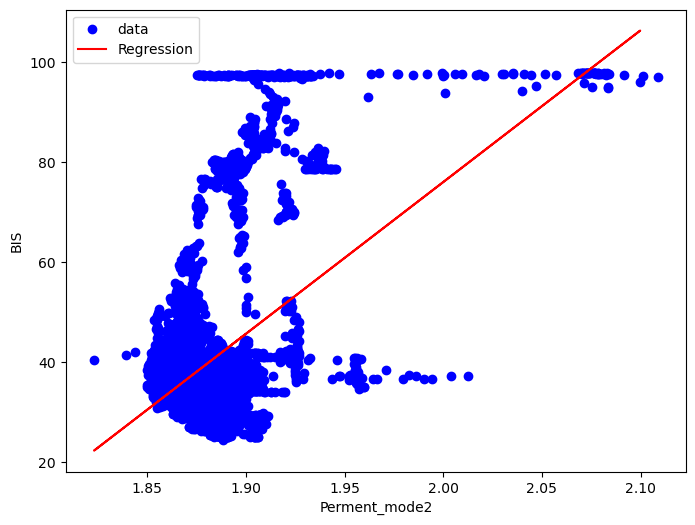

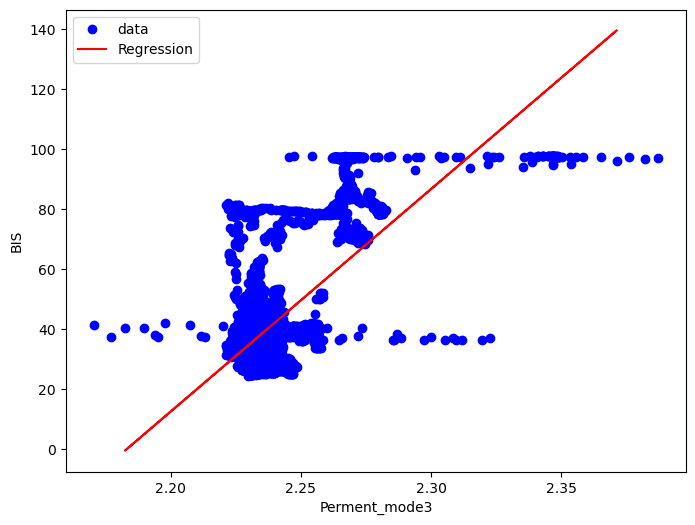

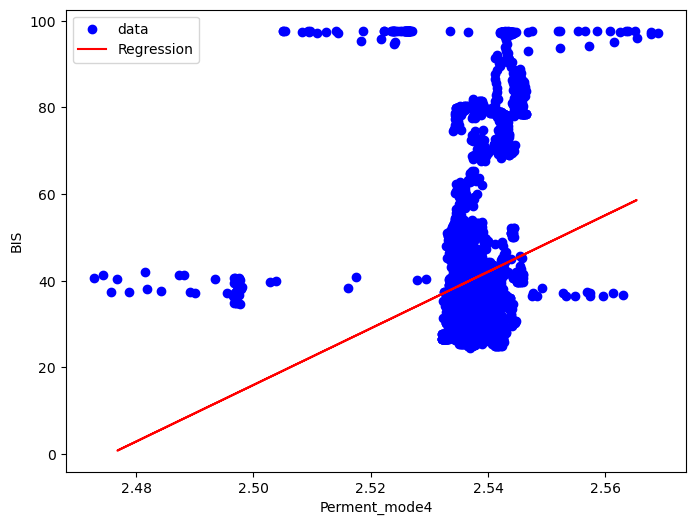

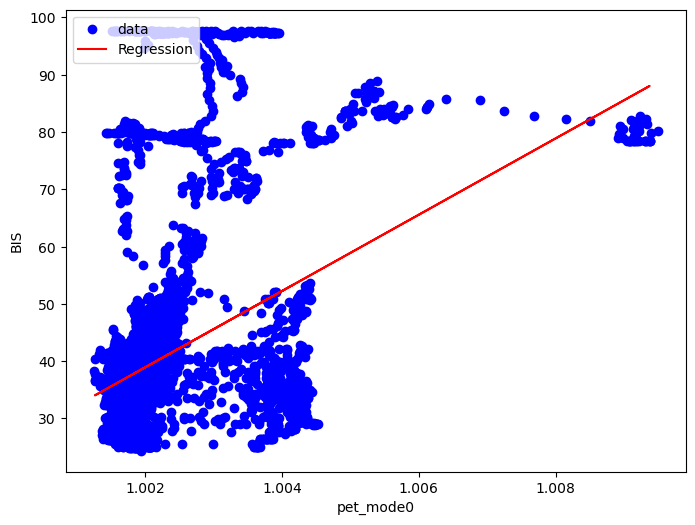

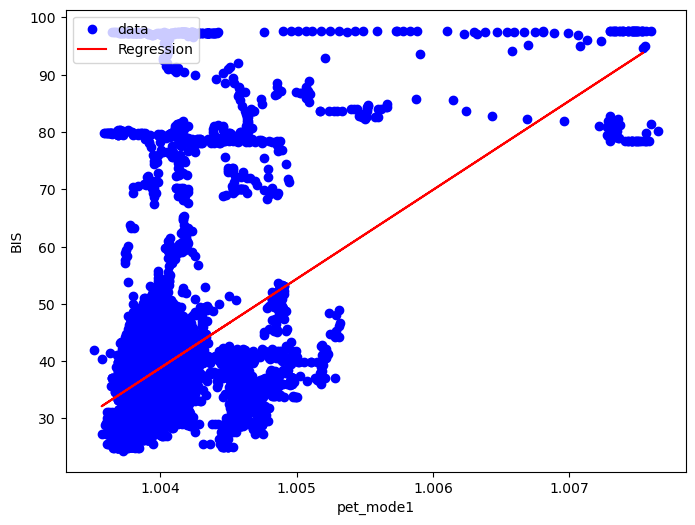

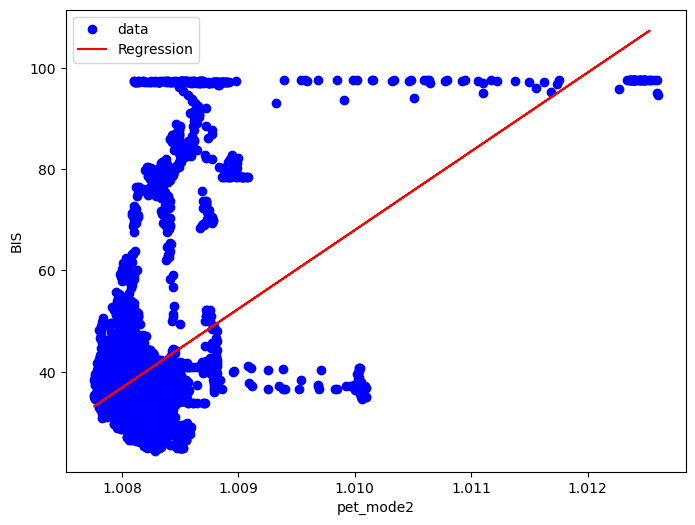

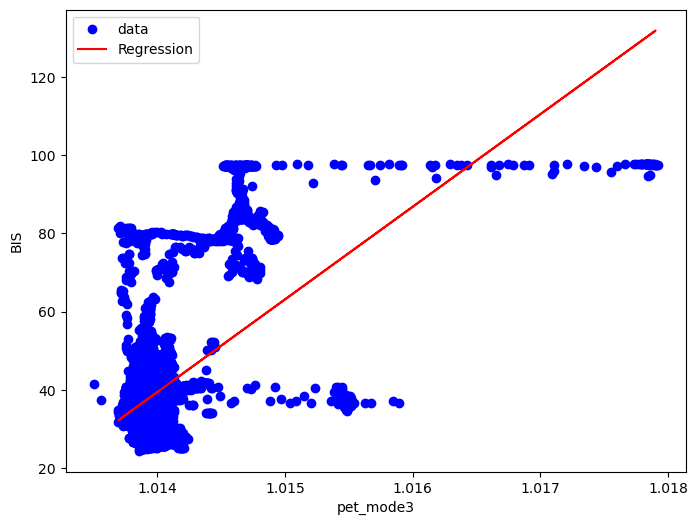

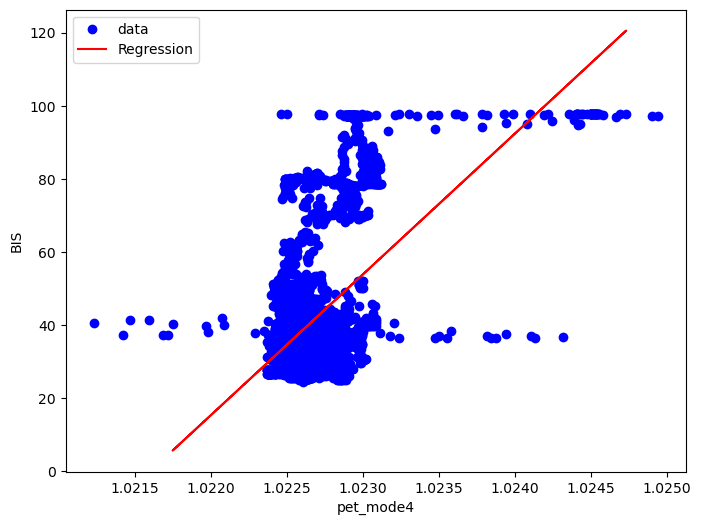

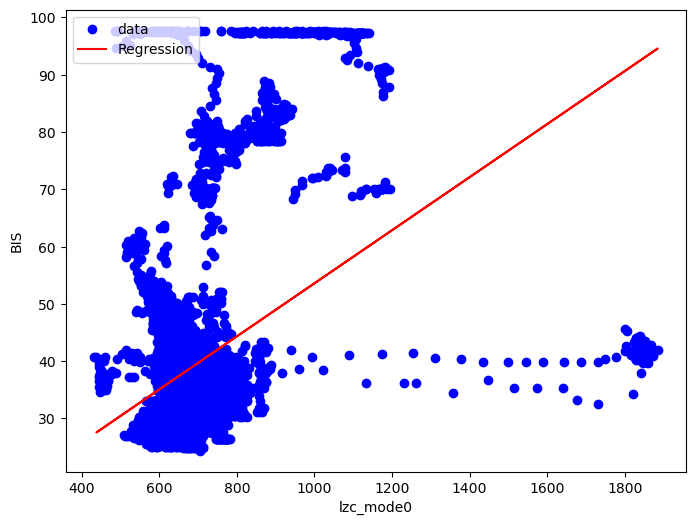

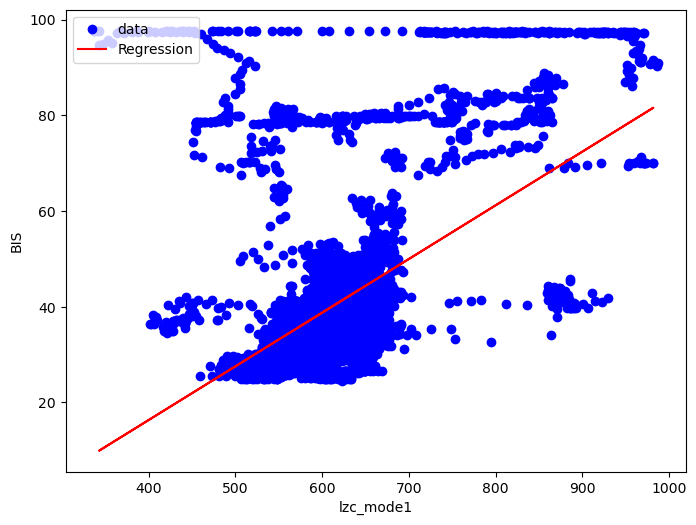

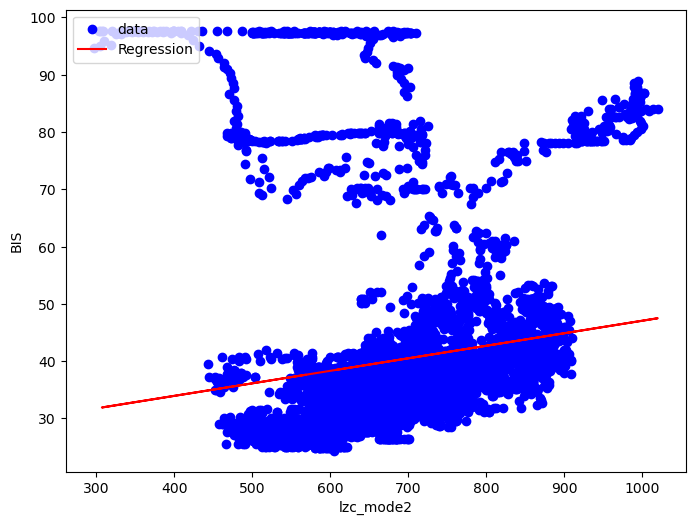

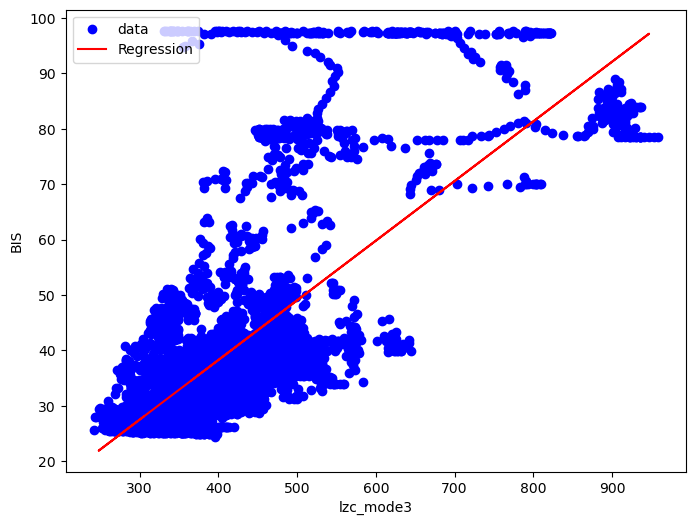

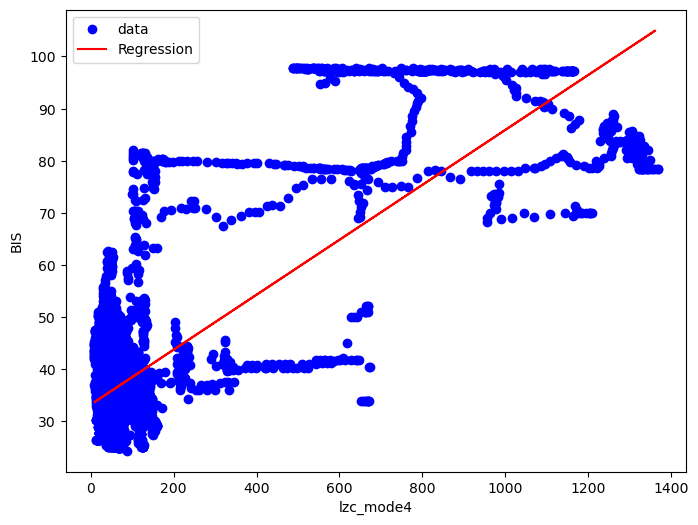

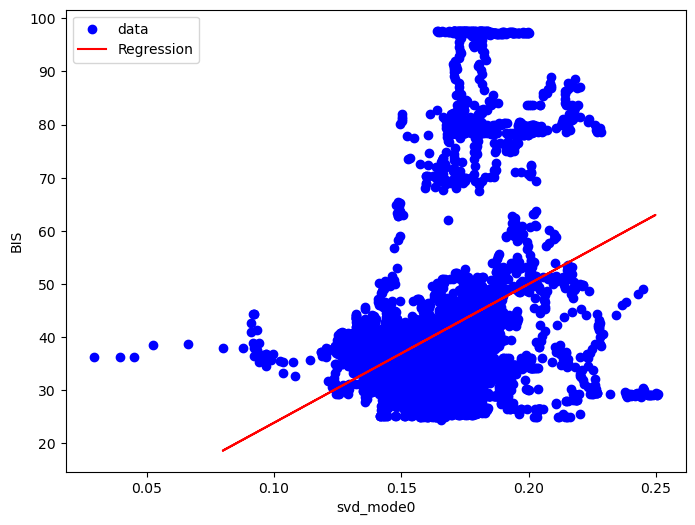

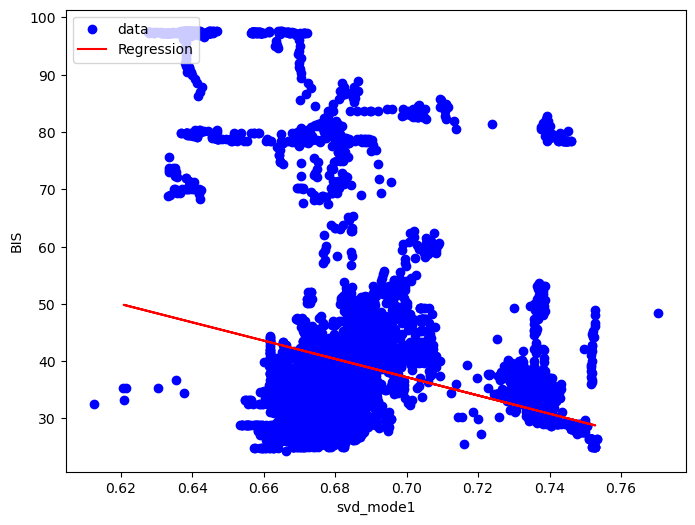

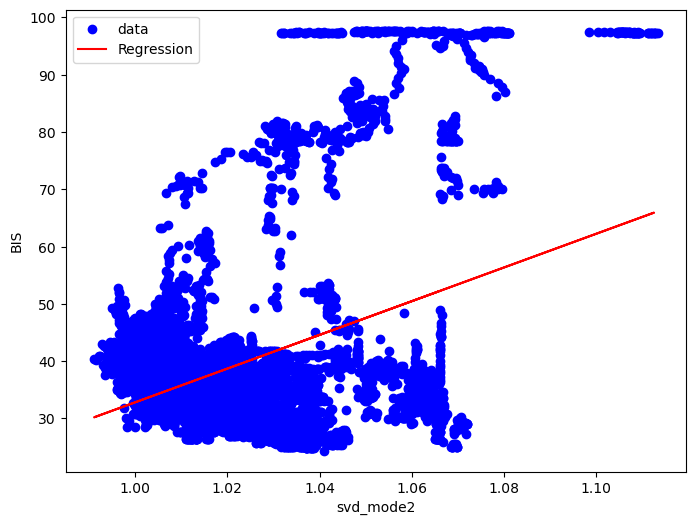

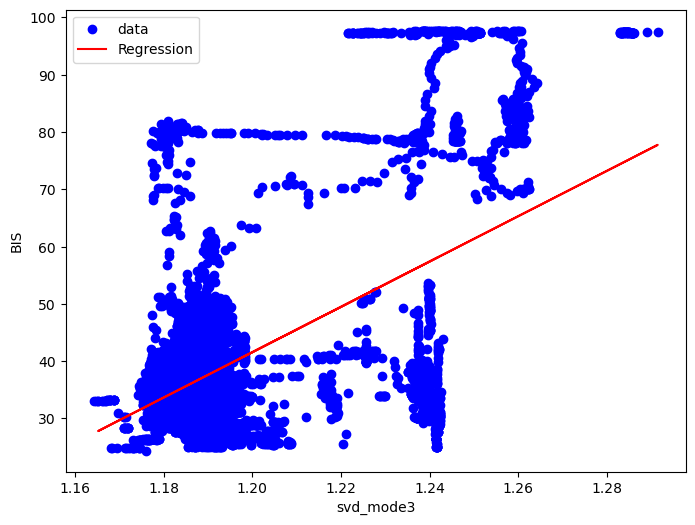

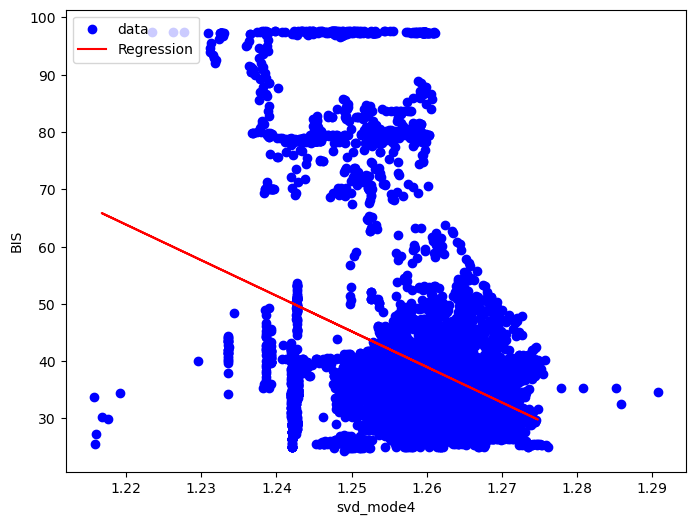

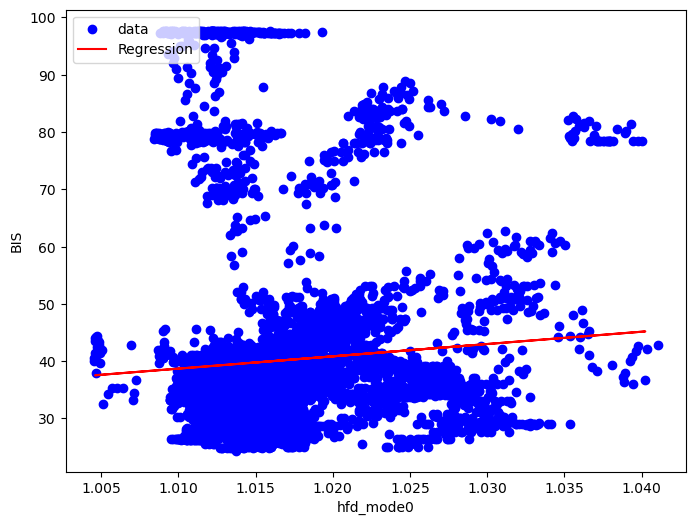

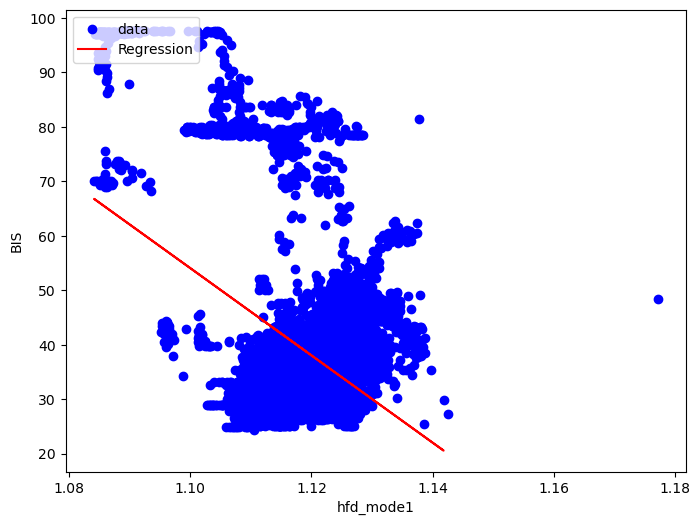

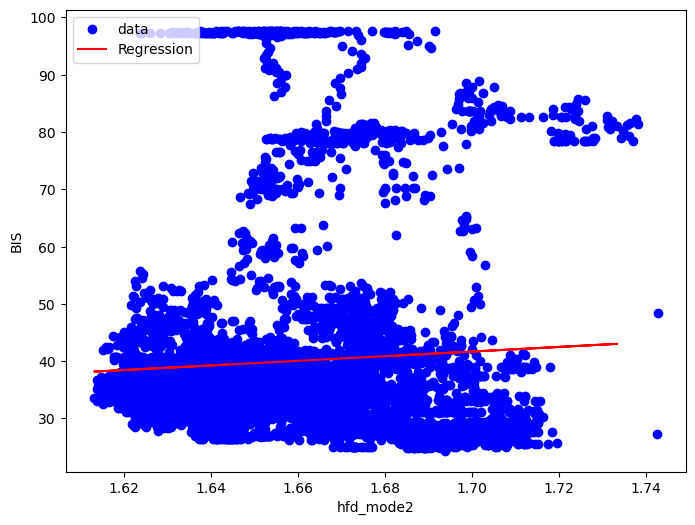

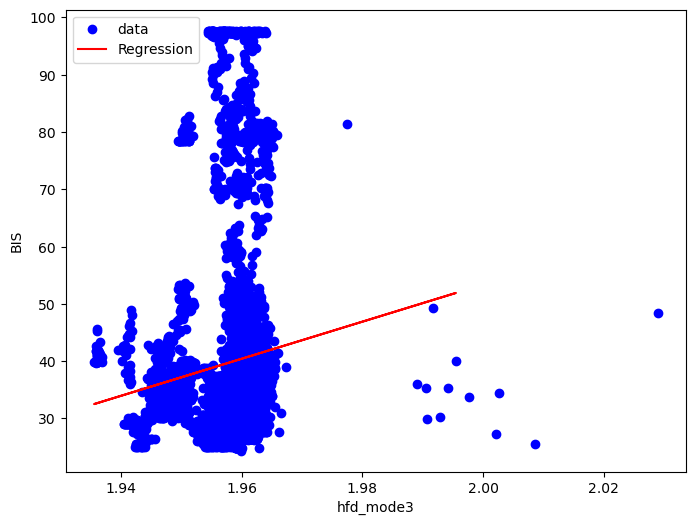

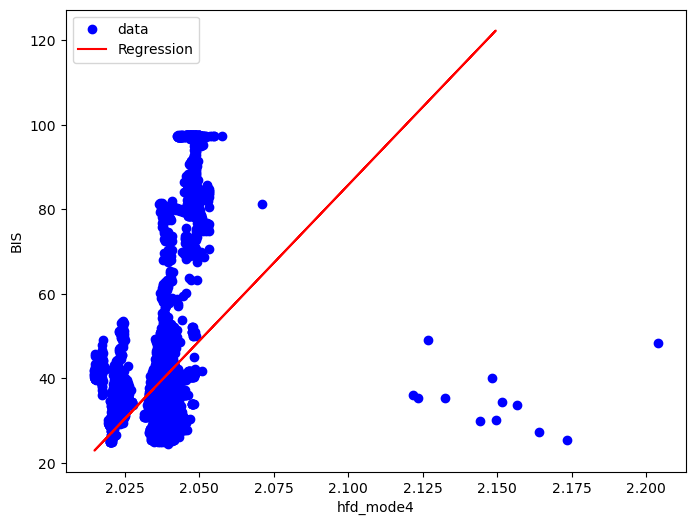

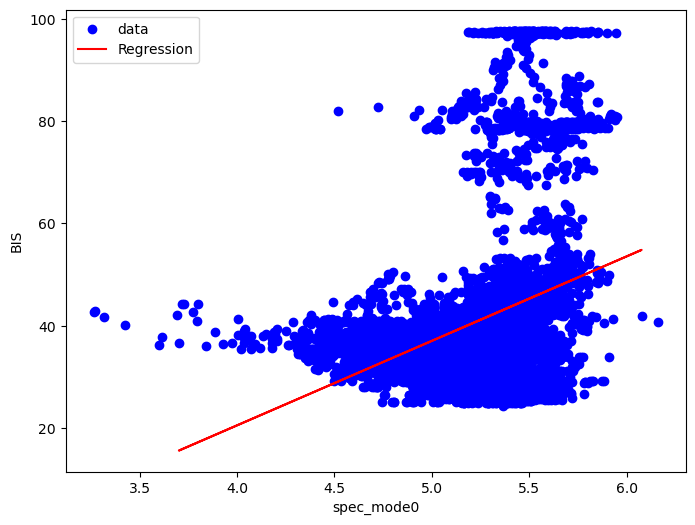

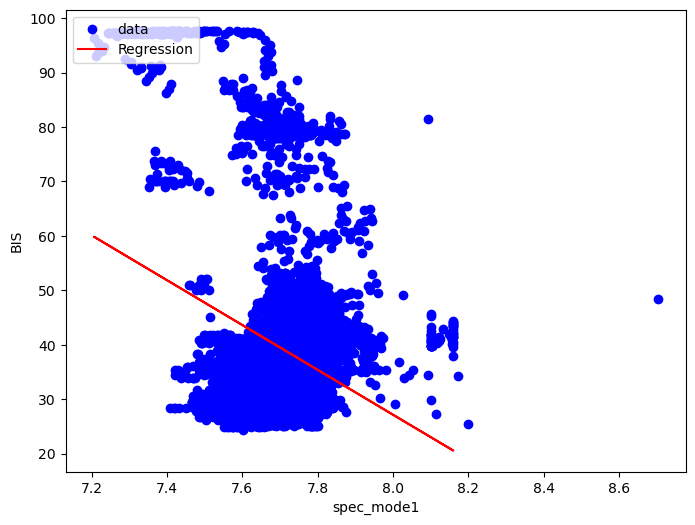

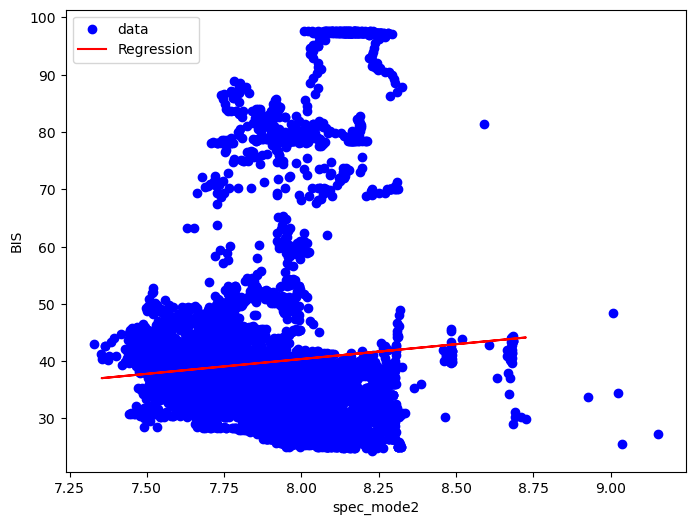

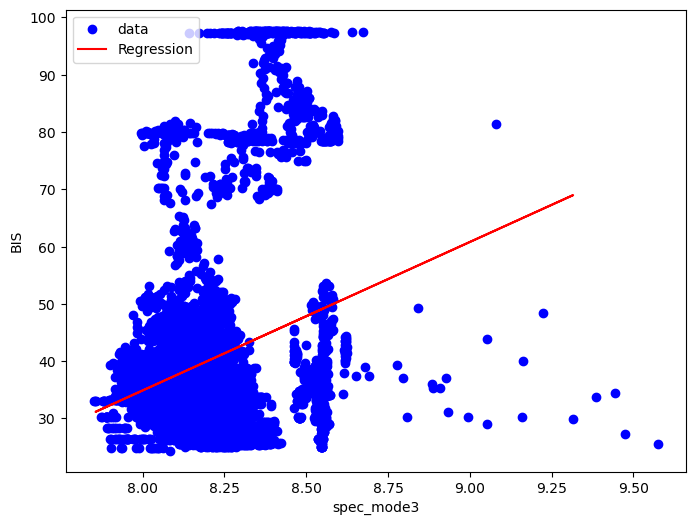

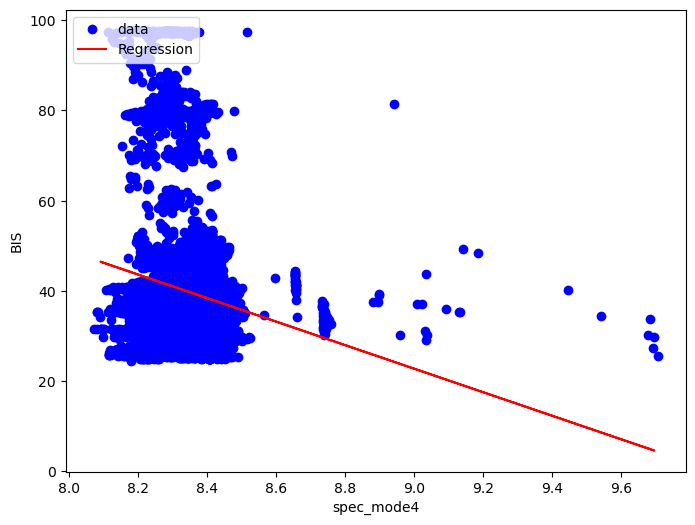

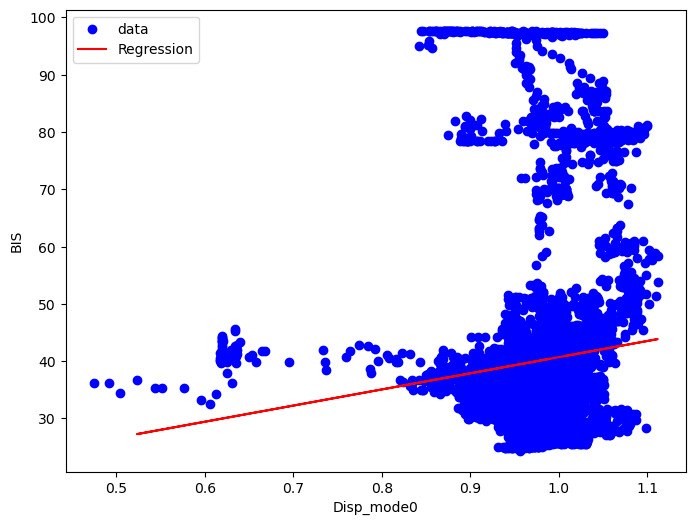

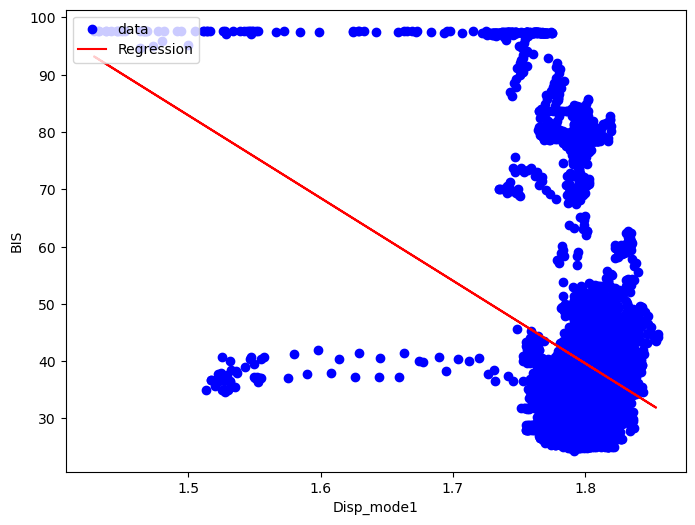

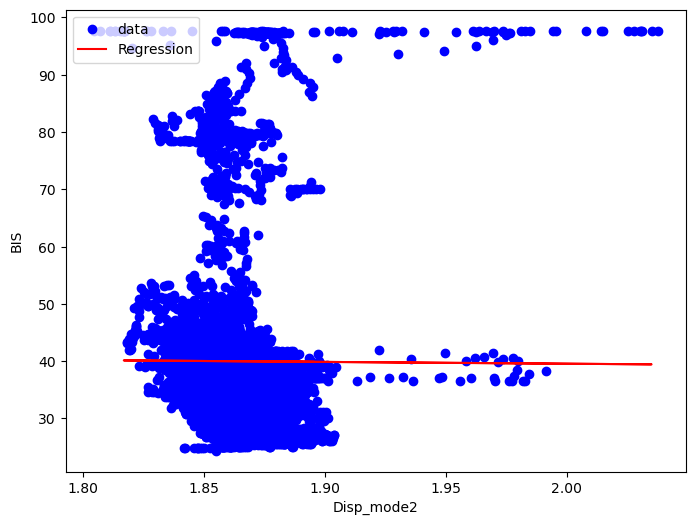

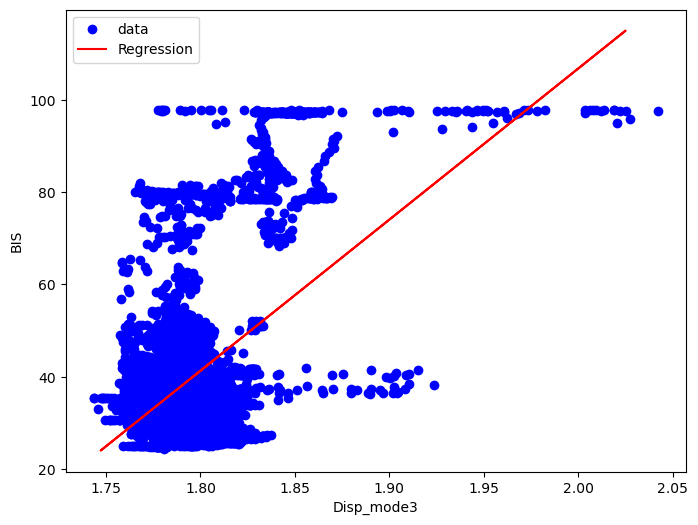

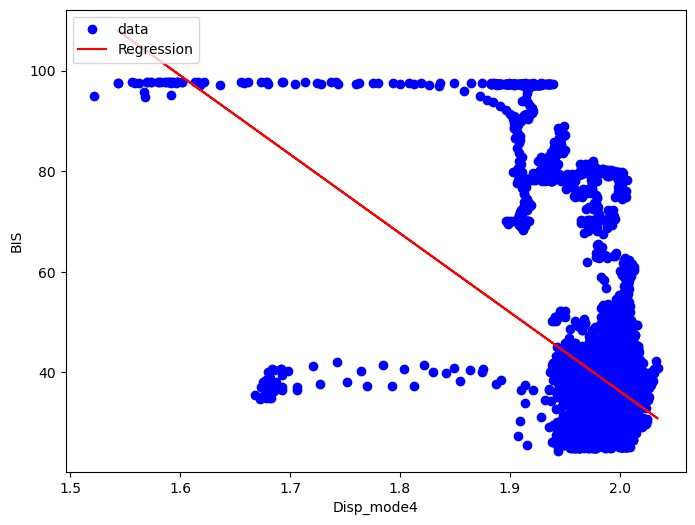

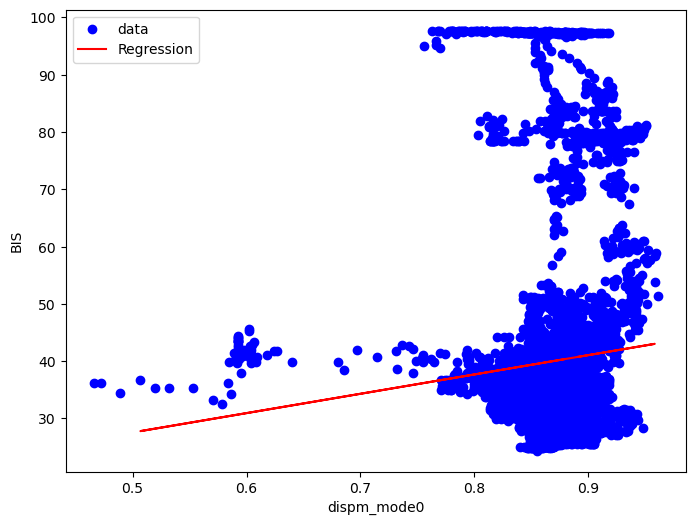

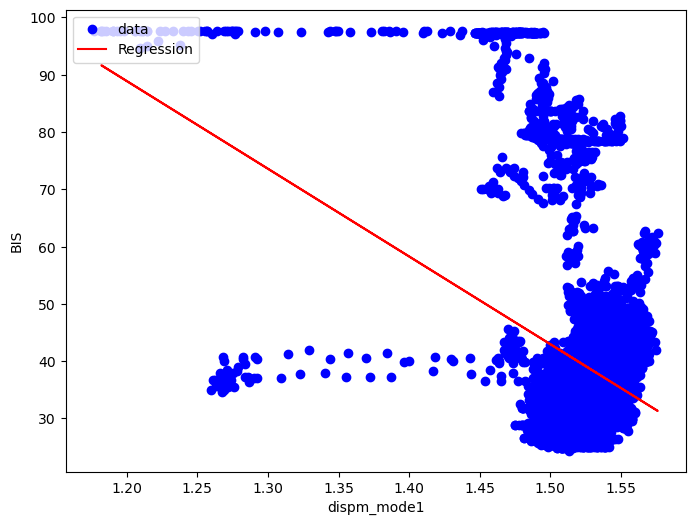

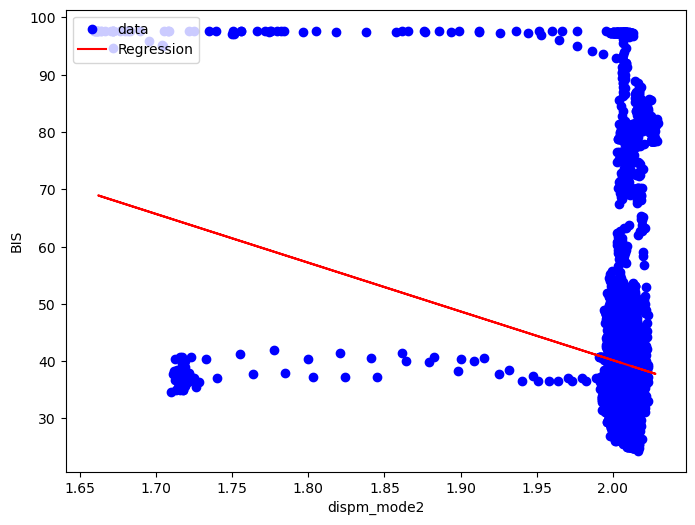

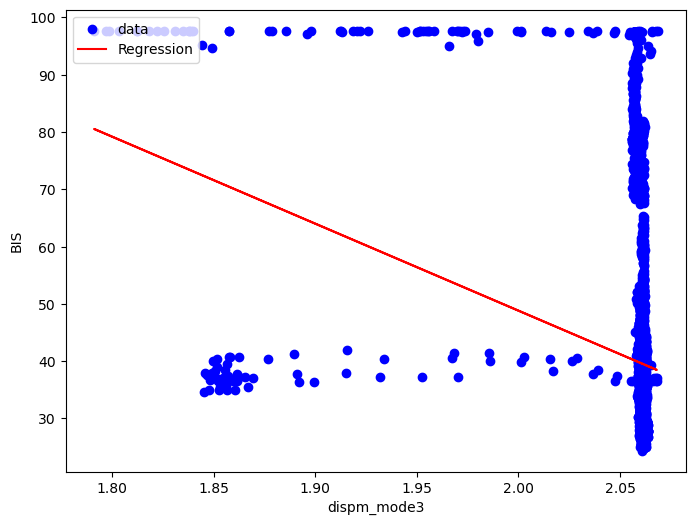

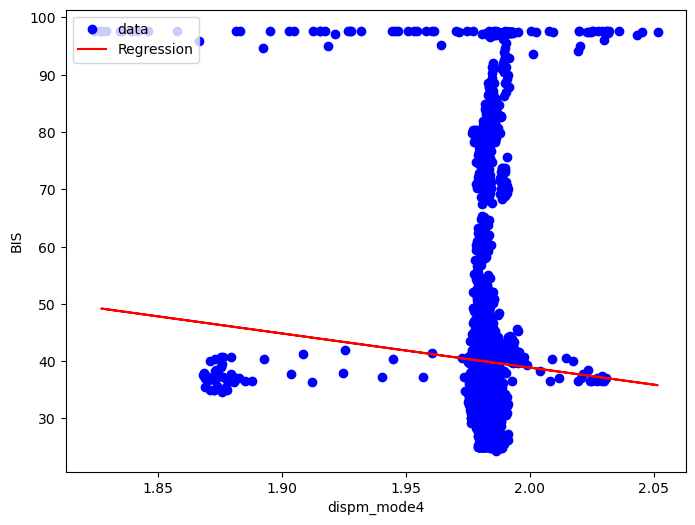

In [6]:

for column in patient_208.columns:
    if column == "BIS":
        continue
        
    plot_regression(patient_208, column)
    


In [7]:
# Metrics
total=pd.DataFrame({"Metrics": [key for key in metrics.keys()], "Values": [value*100 for value in metrics.values()]})

In [8]:
sort_total=total.sort_values('Values', ascending=False)
sort_total

,Metrics,Values
34,lzc_mode4_r2,64.526216
33,lzc_mode3_r2,49.600697
23,Perment_mode3_r2,45.073211
28,pet_mode3_r2,37.466264
3,hm_mode3_r2,37.184146
38,svd_mode3_r2,32.829578
4,hm_mode4_r2,32.533348
7,hc_mode2_r2,31.885844
29,pet_mode4_r2,27.795279
8,hc_mode3_r2,27.396521


### Radom forest feature selection

In [9]:


# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

# Select the top k features (e.g., top 10 features)
k = 10
selected_features = feature_importances_df.head(k)['feature'].tolist()

# Use only the selected features for further analysis or modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


          feature  importance
34      lzc_mode4    0.634706
16     detf_mode1    0.070072
32      lzc_mode2    0.047132
3        hm_mode3    0.043774
23  Perment_mode3    0.041455
0        hm_mode0    0.038621
33      lzc_mode3    0.017495
35      svd_mode0    0.008665
43      hfd_mode3    0.006855
1        hm_mode1    0.006778
51     Disp_mode1    0.006361
42      hfd_mode2    0.005931
30      lzc_mode0    0.004861
45     spec_mode0    0.004671
15     detf_mode0    0.003605
57    dispm_mode2    0.002636
6        hc_mode1    0.002412
31      lzc_mode1    0.002343
46     spec_mode1    0.002271
37      svd_mode2    0.002158
44      hfd_mode4    0.002046
5        hc_mode0    0.001951
36      svd_mode1    0.001907
55    dispm_mode0    0.001813
4        hm_mode4    0.001811
56    dispm_mode1    0.001804
53     Disp_mode3    0.001636
2        hm_mode2    0.001600
41      hfd_mode1    0.001570
21  Perment_mode1    0.001569
22  Perment_mode2    0.001538
24  Perment_mode4    0.001535
52     Dis